In [117]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [118]:
# importando os dados
dataset = pd.read_csv("Churn.csv", sep=";")

# visualizando
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [119]:
# tamanho
dataset.shape

(999, 12)

In [120]:
# a primeira ação é nomear as colunas
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito",
                  "Ativo", "Salario", "Saiu"]

In [121]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [122]:
# explorando dados categóricos - Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

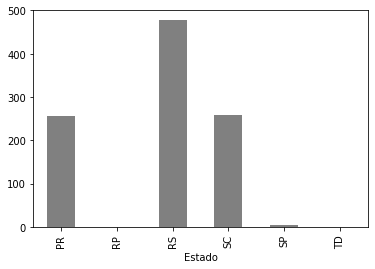

In [123]:
# gerando gráfico do agrupamento por estado
agrupado.plot.bar(color = "gray")

In [124]:
# explorando dados categóricos - Gênero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

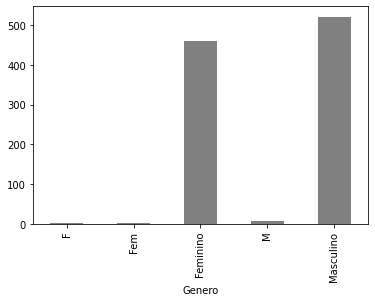

In [125]:
# gerando gráfico do do agrupamento por gênero
agrupado.plot.bar(color = "gray")

In [126]:
# explorando colunas numéricas - Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

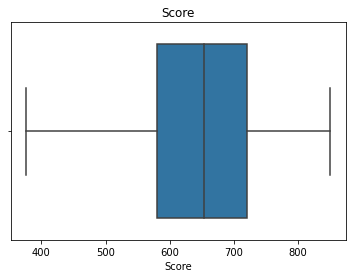

In [127]:
srn.boxplot(x=dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

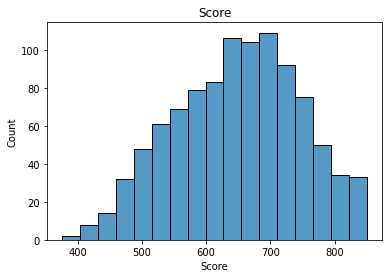

In [128]:
srn.histplot(dataset['Score']).set_title('Score')

In [129]:
# explorando colunas numéricas - Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

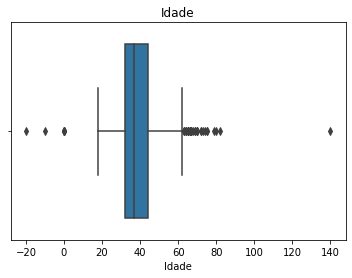

In [130]:
srn.boxplot(x=dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

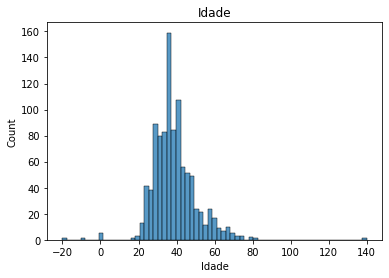

In [131]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [132]:
# explorando colunas numéricas - Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

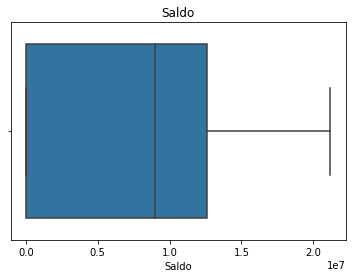

In [133]:
srn.boxplot(x=dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

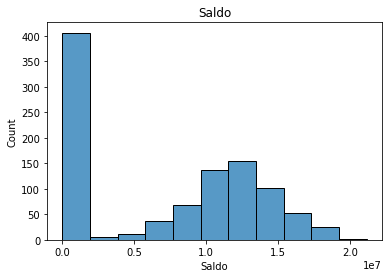

In [134]:
srn.histplot(dataset['Saldo']).set_title('Saldo')

In [135]:
# explorando colunas numéricas - Salário
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

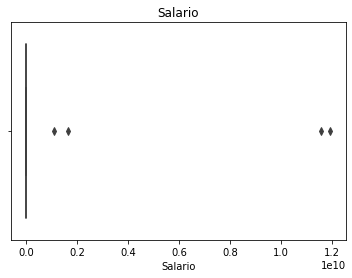

In [136]:
srn.boxplot(x=dataset['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

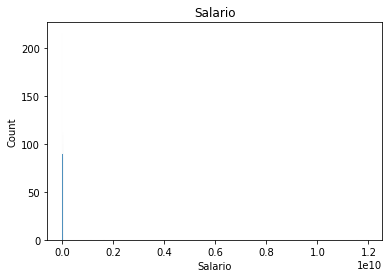

In [137]:
srn.histplot(dataset['Salario']).set_title('Salario')

In [138]:
# contando os valores NaN - Genero e Salario
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [139]:
# removendo campos vazios e substituindo pela mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [140]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [141]:
# substituindo NaN por mediana
dataset['Salario'].fillna(mediana, inplace=True)

In [142]:
# verificando se NaN não existem mais em Salario
dataset['Salario'].isnull().sum()

0

In [143]:
# corrigindo falta de padronização e campos vazios em Genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [144]:
# total de campos vazios
dataset['Genero'].isnull().sum()

8

In [145]:
# preenchendo campos vazios com moda (Masculino)
dataset['Genero'].fillna('Masculino', inplace=True)

# Verificando novamento se ainda há campos vazios
dataset['Genero'].isnull().sum()

0

In [146]:
# padronizando de acordo com a moda
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = "Feminino"

# visualizando o resultado da substituição
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [147]:
# idades fora da moda
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [148]:
# visualizando
dataset.loc[(dataset['Idade'] <= 0) | (dataset['Idade'] > 120), 'Idade']

851      0
867    -10
887      0
930      0
931      0
947      0
984    -20
990    140
Name: Idade, dtype: int64

In [149]:
# calculando a mediana em idade
mediana = sts.median(dataset['Idade'])
mediana

37

In [150]:
# substituindo 
dataset.loc[(dataset['Idade'] <= 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [151]:
# Verificando se ainda existem idades fora da moda
dataset.loc[(dataset['Idade'] <= 0) | (dataset['Idade'] > 120), 'Idade']

Series([], Name: Idade, dtype: int64)

In [152]:
# tratando dados duplicados, buscando pelo ID
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [153]:
# excluindo pelo ID
dataset.drop_duplicates(subset="Id", keep='first', inplace=True)

# buscando dados duplicados, buscando pelo ID
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [154]:
# estados fora da regra de negócio, diferentes de RS, PR e SC
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [155]:
# Atribuindo RS (moda)
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = "RS"
agrupado.groupby(['Estado']).size()

Estado
PR    1
RP    1
RS    1
SC    1
SP    1
TD    1
dtype: int64

In [156]:
# Verificando
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [157]:
# outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [158]:
# definir padrão como maior que 2 desvos padrão
# checamos se algum atende critério
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [159]:
# vamos atualizar salários para mediana, calculamos
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [161]:
# atribuindo
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

# checamos se algum atende critério
dataset.loc[dataset['Salario'] >= 2 * desv ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu,Salário


In [169]:
dataset.drop(columns=['Salário'])

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [170]:
dataset.shape

(998, 13)